In [1]:
import pandas as pd


In [5]:
from google.colab import files
uploaded = files.upload()


Saving Breast-cancer.csv.zip to Breast-cancer.csv (1).zip


In [6]:


# Load the dataset (replace with your exact file name if different)
df = pd.read_csv('Breast-cancer.csv (1).zip')

# Show the first 5 rows
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
print(df['diagnosis'].value_counts(dropna=False))

Series([], Name: count, dtype: int64)


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Re-load the dataset (replace with your exact file name if different)
df = pd.read_csv('Breast-cancer.csv (1).zip')

# Convert diagnosis column to binary
# Assuming 'diagnosis' column has 'M' (Malignant) and 'B' (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop rows with NaN in the 'diagnosis' column after mapping
df.dropna(subset=['diagnosis'], inplace=True)

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)

Shape of training features: (455, 31)
Shape of testing features: (114, 31)


In [17]:
# Train the linear SVM
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_linear = linear_svm.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy of Linear Kernel SVM:", acc_linear)

Accuracy of Linear Kernel SVM: 0.956140350877193


In [18]:
# Train the RBF SVM
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rbf = rbf_svm.predict(X_test_scaled)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy of RBF Kernel SVM:", acc_rbf)


Accuracy of RBF Kernel SVM: 0.9824561403508771


In [19]:
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_scaled)
X_test_2D = pca.transform(X_test_scaled)


In [20]:
# Train SVM with linear and rbf kernels on 2D data
svm_linear_2D = SVC(kernel='linear', random_state=42)
svm_linear_2D.fit(X_train_2D, y_train)

svm_rbf_2D = SVC(kernel='rbf', random_state=42)
svm_rbf_2D.fit(X_train_2D, y_train)


SVC(random_state=42)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title):
    h = .02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()


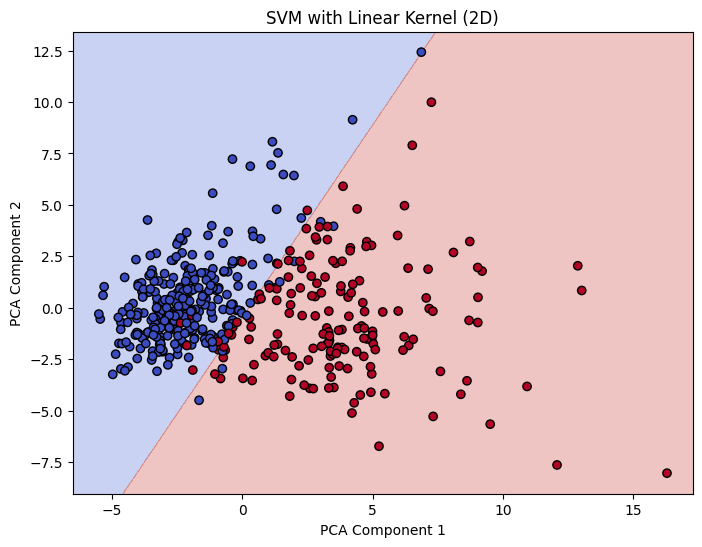

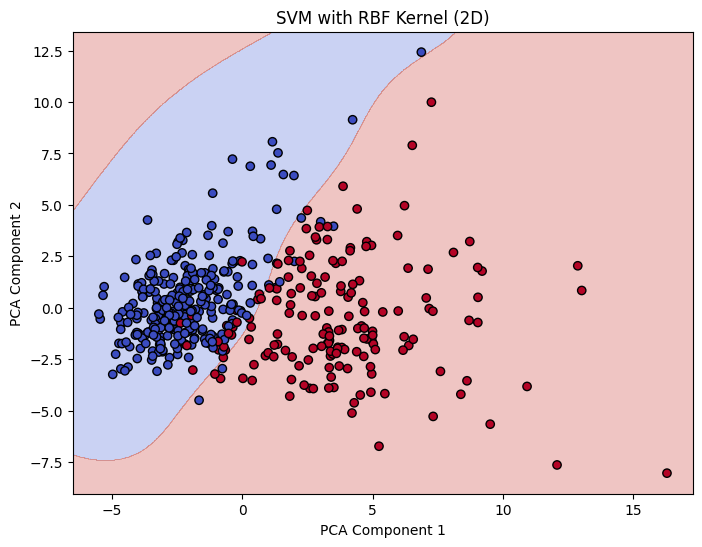

In [22]:
# Linear Kernel
plot_decision_boundary(svm_linear_2D, X_train_2D, y_train, "SVM with Linear Kernel (2D)")

# RBF Kernel
plot_decision_boundary(svm_rbf_2D, X_train_2D, y_train, "SVM with RBF Kernel (2D)")


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization strength
    'gamma': [1, 0.1, 0.01, 0.001],   # Kernel coefficient
    'kernel': ['rbf']                # Keep kernel fixed to RBF
}

# Initialize GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate on test data
from sklearn.metrics import accuracy_score
y_pred_best = grid.predict(X_test_scaled)
print("Test Accuracy with Best Params:", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9736263736263737
Test Accuracy with Best Params: 0.9824561403508771


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np


In [25]:
# Linear kernel SVM
linear_svm = SVC(kernel='linear', C=1)
linear_scores = cross_val_score(linear_svm, X_train_scaled, y_train, cv=5)

# RBF kernel SVM
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_scores = cross_val_score(rbf_svm, X_train_scaled, y_train, cv=5)


In [26]:
print("Linear Kernel SVM - Mean CV Accuracy:", np.mean(linear_scores))
print("Linear Kernel SVM - Std Deviation:", np.std(linear_scores))

print("RBF Kernel SVM - Mean CV Accuracy:", np.mean(rbf_scores))
print("RBF Kernel SVM - Std Deviation:", np.std(rbf_scores))


Linear Kernel SVM - Mean CV Accuracy: 0.9670329670329672
Linear Kernel SVM - Std Deviation: 0.013900121583157732
RBF Kernel SVM - Mean CV Accuracy: 0.9736263736263737
RBF Kernel SVM - Std Deviation: 0.016446845656149216


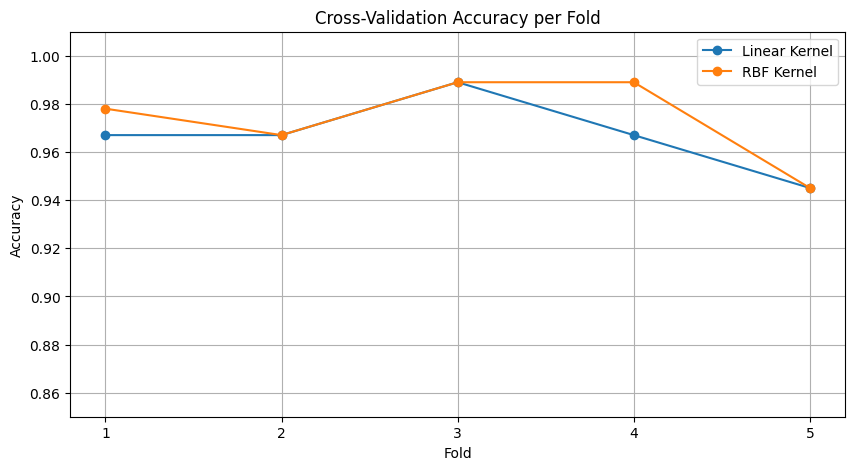

In [27]:
import matplotlib.pyplot as plt

# Plot cross-validation scores
plt.figure(figsize=(10, 5))

# Plot Linear SVM scores
plt.plot(range(1, 6), linear_scores, marker='o', label='Linear Kernel')

# Plot RBF SVM scores
plt.plot(range(1, 6), rbf_scores, marker='o', label='RBF Kernel')

# Labels and legend
plt.title("Cross-Validation Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.xticks(range(1, 6))
plt.ylim(0.85, 1.01)
plt.legend()
plt.grid(True)
plt.show()


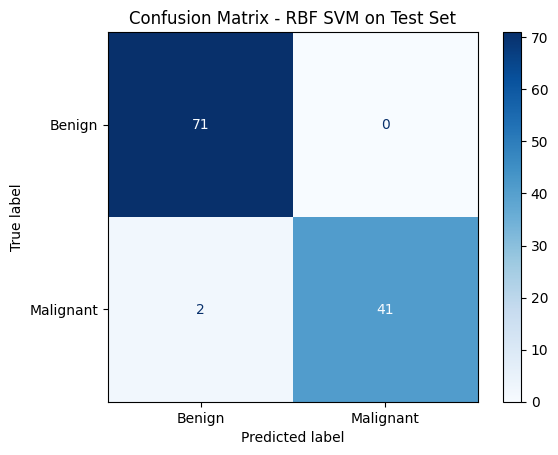

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fit best model on training data
final_model = SVC(kernel='rbf', C=1, gamma='scale')  # Replace with grid.best_estimator_ if tuned
final_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_final = final_model.predict(X_test_scaled)

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - RBF SVM on Test Set")
plt.show()


In [29]:
from sklearn.feature_selection import RFE

# Use SVM as the base model
svc = SVC(kernel='linear')
rfe = RFE(estimator=svc, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe.fit_transform(X_train_scaled, y_train)

# Train with reduced features
svc.fit(X_rfe, y_train)
print("Selected features:", X.columns[rfe.support_])


Selected features: Index(['compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'area_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'area_worst', 'fractal_dimension_worst'],
      dtype='object')


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = {
    'SVM (RBF)': SVC(kernel='rbf', C=1, gamma='scale'),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")


SVM (RBF): Mean Accuracy = 0.9736
Random Forest: Mean Accuracy = 0.9560
Logistic Regression: Mean Accuracy = 0.9736
KNN: Mean Accuracy = 0.9626


In [31]:
import plotly.express as px
X_2d = PCA(n_components=2).fit_transform(X_train_scaled)
df_plot = pd.DataFrame(X_2d, columns=['PC1', 'PC2'])
df_plot['diagnosis'] = y_train.values

px.scatter(df_plot, x='PC1', y='PC2', color='diagnosis', title='PCA - Interactive View')
